In [1]:
# Import.
import os

import numpy as np

from models.dbn import DBN

from utils import (
    load_alphadigit,
    read_alpha_digit,
    plot_characters_alphadigit,
    plot_generated_images
)

In [2]:
DATA_FOLDER = "../data/"
RESULTS_FOLDER = "../results/"
WEIGHTS_FOLDER = os.path.join(RESULTS_FOLDER, "weights")
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")

for path in [ALPHA_DIGIT_PATH, WEIGHTS_FOLDER]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"The file {path} does not exist.")

SEED = 42

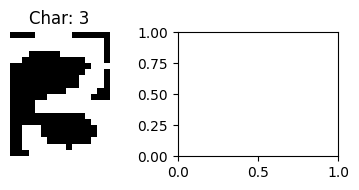

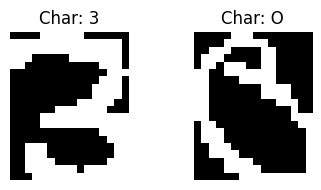

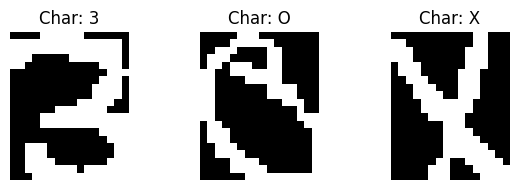

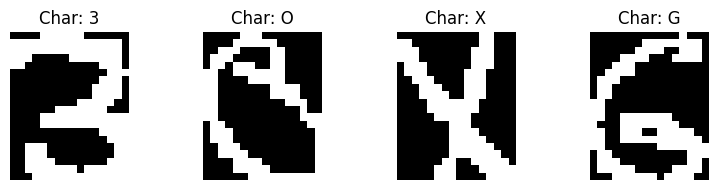

Original data: (36, 39)
Original data (unstack samples -> flatten images): (1365, 320)
Subset (39 characters) data  (39, 320)
Subset (78 characters) data  (78, 320)
Subset (117 characters) data  (117, 320)
Subset (156 characters) data  (156, 320)


In [3]:
alphadigit = load_alphadigit(ALPHA_DIGIT_PATH)

chars_1 = [3]
chars_2 = chars_1 + ["O"]
chars_3 = chars_2 + ["X"]
chars_4 = chars_3 + ["G"]
chars_list = [chars_1, chars_2, chars_3, chars_4]
data_alphas = [
    read_alpha_digit(chars, data=alphadigit, use_data=True) 
    for chars in [chars_1, chars_2, chars_3, chars_4]
]

all_chars = np.arange(0, 35).tolist()
alphadigit_data = read_alpha_digit(all_chars, data=alphadigit, use_data=True) # read all characters

for chars, data_alpha in zip(chars_list, data_alphas):
    plot_characters_alphadigit(chars, data_alpha)

print("Original data:", alphadigit.shape)
print("Original data (unstack samples -> flatten images):", alphadigit_data.shape)
for i, data_alpha in enumerate(data_alphas):
    print(f"Subset ({len(data_alpha)} characters) data ", data_alpha.shape)

In [4]:
data_alpha = data_alphas[2]
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
hidden_layer_sizes = [256, 512, 256]

learning_rate = 1e-3
n_epochs = 1000
batch_size = 64

dbn = DBN(n_visible=n_visible, hidden_layer_sizes=hidden_layer_sizes, random_state=SEED)
print(dbn)
dbn_errors, dbn_losses = dbn.train(data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size)

DBN([
 RBM(n_visible=320, n_hidden=256),
 RBM(n_visible=256, n_hidden=512),
 RBM(n_visible=512, n_hidden=256)
])


Training RBM layers:   0%|          | 0/3 [00:00<?, ?layer/s]

Training RBM layers:   0%|          | 0/3 [00:10<?, ?layer/s]


TypeError: 'numpy.float64' object is not iterable

In [ ]:
generated_images = dbn.generate_image(n_samples=20, n_gibbs_steps=1000)

100%|██████████| 1000/1000 [00:00<00:00, 2747.27it/s]


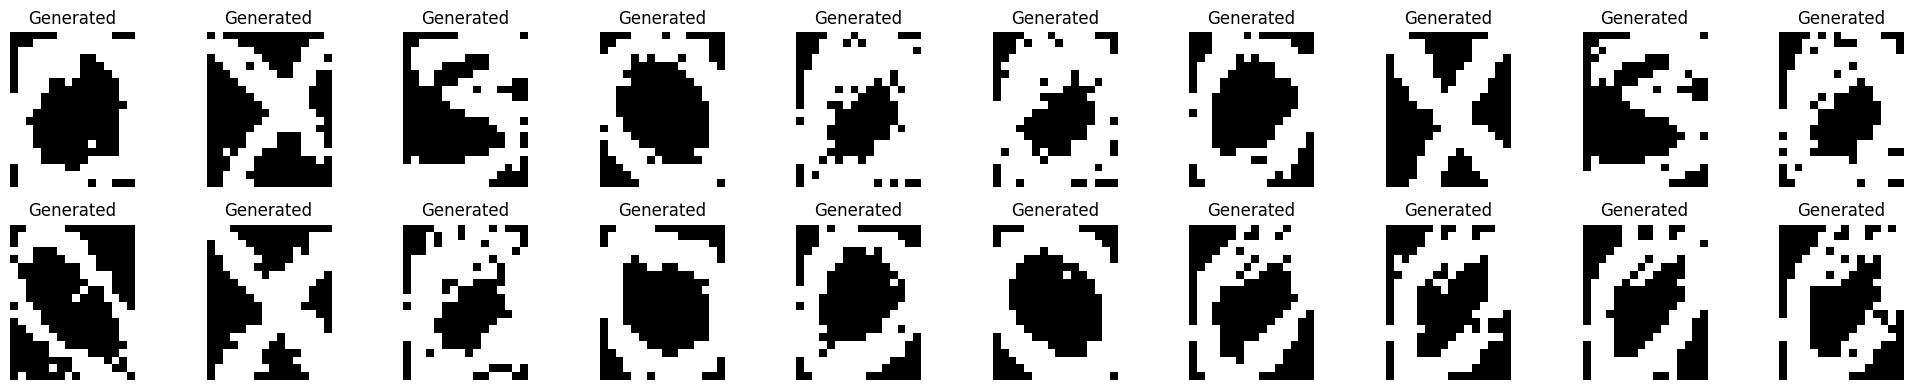

In [ ]:
plot_generated_images(generated_images, n_cols=10, reshape_generated=(20, 16))